# Sistemas Inteligentes 2021/2022

## Mini-projeto 3: Aprendizagem Automática

## Relatório


## Grupo: 42

Número:  53687       Nome:   Ariana Dias  

Número:  51127       Nome:   Luís Ferreirinha

## 1. Processamento dos dados

Para processarmos os dados vamos utilizar a biblioteca pandas e numpy

In [1]:
import pandas as pd
import numpy as np

Começamos por ler o ficheiro csv com os dados de treino e guarda-mos o conteúdo num dataframe.

In [2]:
df_train = pd.read_csv("train.csv")

Vamos confirmar que os dados foram corretamente importados

In [3]:
df_train

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0,2644,C,D-penicillamine,20296,F,N,N,N,N,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7,1.0
1,1,3492,C,Unknown,21915,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6,2.0
2,2,1702,C,D-penicillamine,18806,F,N,N,N,N,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6,1.0
3,3,3523,C,Unknown,14610,F,Unknown,Unknown,Unknown,N,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2,2.0
4,4,3428,D,Placebo,13727,F,N,Y,Y,Y,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,324,2255,C,D-penicillamine,22642,F,N,N,N,N,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0,1.0
325,325,1899,C,Unknown,14975,M,Unknown,Unknown,Unknown,N,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0,4.0
326,326,1152,D,D-penicillamine,25546,M,N,Y,N,N,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9,3.0
327,327,71,D,D-penicillamine,18972,F,N,Y,Y,S,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6,4.0


Vamos extrair os valores das classes

In [4]:
y_train = df_train["Stage"].values
y_train

array([1., 2., 1., 2., 3., 4., 3., 4., 4., 4., 4., 1., 1., 3., 3., 1., 3.,
       4., 4., 4., 1., 2., 2., 2., 3., 2., 4., 4., 4., 4., 3., 1., 4., 4.,
       3., 3., 4., 3., 3., 2., 4., 3., 2., 2., 3., 3., 4., 3., 3., 2., 4.,
       4., 2., 2., 2., 3., 4., 1., 4., 1., 3., 2., 2., 3., 3., 4., 4., 4.,
       3., 3., 3., 4., 3., 3., 3., 2., 2., 4., 4., 3., 3., 3., 2., 2., 2.,
       4., 3., 4., 4., 3., 4., 4., 3., 4., 3., 3., 4., 3., 4., 2., 2., 3.,
       2., 2., 3., 2., 2., 4., 3., 4., 4., 4., 3., 2., 4., 2., 2., 4., 4.,
       3., 4., 4., 4., 3., 1., 2., 2., 4., 3., 2., 4., 2., 4., 4., 4., 4.,
       3., 3., 4., 2., 2., 3., 2., 2., 2., 3., 4., 4., 4., 3., 4., 4., 4.,
       3., 4., 2., 4., 4., 2., 3., 4., 2., 2., 3., 3., 3., 4., 4., 4., 3.,
       2., 1., 3., 3., 4., 3., 3., 4., 2., 3., 3., 2., 3., 4., 4., 2., 4.,
       2., 3., 3., 1., 4., 4., 1., 4., 2., 3., 4., 4., 3., 2., 3., 2., 4.,
       2., 3., 3., 4., 3., 2., 3., 4., 3., 2., 4., 4., 3., 3., 3., 4., 3.,
       4., 3., 4., 3., 4.

Como este conjunto de dados contém dados categóricos misturados com contínuos vamos ter de separar os categóricos e converter em dados binários utilizando o get_dummies()

In [5]:
df_categorical = df_train.select_dtypes([object])
df_categorical

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
0,C,D-penicillamine,F,N,N,N,N
1,C,Unknown,F,Unknown,Unknown,Unknown,N
2,C,D-penicillamine,F,N,N,N,N
3,C,Unknown,F,Unknown,Unknown,Unknown,N
4,D,Placebo,F,N,Y,Y,Y
...,...,...,...,...,...,...,...
324,C,D-penicillamine,F,N,N,N,N
325,C,Unknown,M,Unknown,Unknown,Unknown,N
326,D,D-penicillamine,M,N,Y,N,N
327,D,D-penicillamine,F,N,Y,Y,S


Também guardamos os atributos com variáveis continuas num outro dataframe, retiramos a coluna ID pois esta é uma variável independente e também a Stage porque representa as classes.

In [6]:
df_numerical = df_train.select_dtypes([np.number]).drop(columns=["ID","Stage"])
df_numerical

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,2644,20296,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,9.7
1,3492,21915,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,10.6
2,1702,18806,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6
3,3523,14610,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,11.2
4,3428,13727,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,11.7
...,...,...,...,...,...,...,...,...,...,...,...
324,2255,22642,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,11.0
325,1899,14975,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,11.0
326,1152,25546,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,10.9
327,71,18972,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,11.6


Obtemos os dummies do dataframe das categóricas

In [7]:
df_categorical_dummies = pd.get_dummies(df_categorical)

column_names_dum = np.array(df_categorical_dummies.columns)

df_categorical_dummies

,Status_C,Status_CL,Status_D,Drug_D-penicillamine,Drug_Placebo,Drug_Unknown,Sex_F,Sex_M,Ascites_N,Ascites_Unknown,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
325,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0
326,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0
327,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0


E agora juntam-mos os dois dataframes

In [8]:
df_train_processado = pd.concat([df_numerical, df_categorical_dummies], axis=1, join='inner')

df_train_processado

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Unknown,Hepatomegaly_Y,Spiders_N,Spiders_Unknown,Spiders_Y,Edema_N,Edema_S,Edema_Y
0,2644,20296,0.5,369.510563,3.85,63.000000,663.000000,79.050000,124.702128,311.0,...,0,1,0,0,1,0,0,1,0,0
1,3492,21915,0.6,369.510563,4.38,97.648387,1982.655769,122.556346,124.702128,269.0,...,0,0,1,0,0,1,0,1,0,0
2,1702,18806,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,...,0,1,0,0,1,0,0,1,0,0
3,3523,14610,0.6,369.510563,4.04,97.648387,1982.655769,122.556346,124.702128,130.0,...,0,0,1,0,0,1,0,1,0,0
4,3428,13727,3.3,299.000000,3.55,131.000000,1029.000000,119.350000,50.000000,199.0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,2255,22642,0.6,213.000000,4.07,12.000000,5300.000000,57.350000,68.000000,240.0,...,0,1,0,0,1,0,0,1,0,0
325,1899,14975,1.7,369.510563,3.66,97.648387,1982.655769,122.556346,124.702128,92.0,...,0,0,1,0,0,1,0,1,0,0
326,1152,25546,2.3,586.000000,3.01,243.000000,2276.000000,114.700000,126.000000,339.0,...,0,0,0,1,1,0,0,1,0,0
327,71,18972,12.2,394.000000,3.08,111.000000,2132.000000,155.000000,243.000000,165.0,...,0,0,0,1,0,0,1,0,1,0


E assim obtemos a matrix com os valores

In [9]:
X_train = df_train_processado.values
X_train

array([[2.6440e+03, 2.0296e+04, 5.0000e-01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.4920e+03, 2.1915e+04, 6.0000e-01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.7020e+03, 1.8806e+04, 1.1000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.1520e+03, 2.5546e+04, 2.3000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.1000e+01, 1.8972e+04, 1.2200e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.8740e+03, 2.4257e+04, 6.0000e-01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

## 2. Ajustamento dos modelos


### 2.1. Teste de modelos e validação

Vamos agora criar os diferentes modelos e avaliar a sua performance, após criarmos cada um dos modelos vamos ajustá-los ao problema e tentar obter as melhores classificações para cada um dos classificadores, portanto vamos utilizar o k-folds para validar os modelos e a average cross-validation accuracy como métrica de desempenho para cada classificador.  

Para cada classificador iremos guardar as accuracies obtidas para depois pudermos comparar

In [10]:
scores_finais = {}

### Decision Tree  

Vamos começar por criar uma Decision Tree (sem ajustar parâmetros) e treinar com todos os dados de treino.

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

dtc = DecisionTreeClassifier(criterion="entropy")

scores = cross_val_score(dtc,
                         X=X_train,
                         y=y_train,
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.3939393939393939
	0.5151515151515151
	0.3333333333333333
	0.30303030303030304
	0.30303030303030304
	0.5454545454545454
	0.3939393939393939
	0.36363636363636365
	0.36363636363636365
	0.4375
Average CV accuracy: 0.395 +/- 0.078


Uma decision tree sem qualquer ajuste dos seus parâmetros tem uma accuracy terrível. Para melhorar-mos esta accuracy podemos ajustar os seguintes parâmetros.
```
max_depth
min_samples_split
min_samples_leaf
```
Mas primeiro vamos tentar reduzir a dimensão do problema, para fazer-mos isto vamos eliminar os atributos de menor importância do nosso conjunto de dados utilizando Recursive Feature Elimination (RFE). Podemos importar esta classe do módulo feature_selection do sklearn.

O RFE vai tentar determinar a importância de cada um dos atributos fazendo prune dos atríbutos menos importantes do conjunto atual de atríbutos, este procedimento depois é repetido recursivamente até se atingir o número de features especifícado.

In [13]:
# Exemplo do RFE
from sklearn.feature_selection import RFE
# Passamos o nosso estimador como parâmetro e o número de atributos a selecionar
# Como não indicamos o número de atributos este será metade por defeito
rfe_teste = RFE(estimator=DecisionTreeClassifier(criterion="entropy"))
rfe_teste.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier(criterion='entropy'))

Podemos ver o ranking de cada um dos atributos do nosso problema, os mais relevântes terão um número menor

In [13]:
rfe_teste.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  9, 11,  1, 16, 15,  1,
        2,  3,  4,  6,  7,  5,  1,  1,  8, 10, 12, 13, 14, 17])

E podemos obter a máscara que nos vai permitir selecionar os melhores atributos para treinar-mos os nosso modelo

In [14]:
rfe_teste.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False])

Fazendo um teste simples podemos observar que a nossa accuracy média aumentou sem termos alterado nenhum dos pârametros da decision tree!

In [15]:
scores = cross_val_score(dtc,
                        # IMPORTANTE! Temos de transformar os dados de treino usando a mascara que rfe obteve!
                         X=rfe_teste.transform(X_train),
                         y=y_train,
                         cv=10
                        )
print('CV accuracy:', *scores, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy:
	0.3939393939393939
	0.45454545454545453
	0.3333333333333333
	0.2727272727272727
	0.3939393939393939
	0.5151515151515151
	0.42424242424242425
	0.3333333333333333
	0.3333333333333333
	0.375
Average CV accuracy: 0.383 +/- 0.066


O RFE permite-nos especificar o número de features que desejamos fazer prune, por default este faz prune de metade dos features. Como não sabemos o número ideal de features vamos ter de o procurar.

Agora podemos voltar aos parâmetros da decision tree. Para melhorar-mos este classificador vamos ter de ajustar os parâmetros ao nosso problema, como já referimos anteriormente vamos apenas ajustar três parâmetros (que foram dados nas aulas), uma forma simples de o fazer seria utilizando 3 ciclos for para variar cada um dos parâmetros e calcular a average accuracy para cada ciclo. Como temos também de descobrir o melhor número de atributos a remover e como o RFE depende do estimador, vamos ter de fazer uma procura em 4 dimensões com 4 ciclos for.

Portanto o nosso algoritmo de procura será:
- Variar max_depth, min_samples_split, min_samples_leaf
    - Variar o número de features a remover
        - Determinar os features a remover usando RFE
        - Treinar modelo com dados de treino transformados pelo RFE
        - Validar utilizando o k-folds e guardar a accuracy média para esta combinação de parâmetros num dicionário  
  
- Obter o valor máximo de accuracy e os parâmetros correspondentes

In [16]:
# Queremos descobrir a depth máxima para pudermos determinar o dominio de procura deste parametro
dtc.fit(X_train,y_train)
dtc.get_depth()

12

In [18]:
# Atencao! Esta procura demora cerca de 18 minutos!

scores = {}

param_grid = {'max_depth' : [i for i in range(2,10)], 'min_samples_split' : [i for i in range(2,30,2)], 'min_samples_leaf' : [i for i in range(2,30,2)],
              'n_features_to_select' : [i for i in range(5,20,2)]}


for depth in param_grid["max_depth"]:
    for samples_split in param_grid["min_samples_split"]:
        for samples_leaf in param_grid["min_samples_leaf"]:
            for n_features in param_grid['n_features_to_select']:
                # Criar modelo
                dtc_test = DecisionTreeClassifier(criterion="entropy", 
                                             max_depth=depth, 
                                             min_samples_split=samples_split,
                                             min_samples_leaf=samples_leaf)

                # Determinar atributos a remover
                rfe_dtc = RFE(estimator=dtc_test, n_features_to_select=n_features)
                rfe_dtc.fit(X_train,y_train)
                # 10-fold CV
                test_scores = cross_val_score(dtc_test,
                                              X=rfe_dtc.transform(X_train), # Usar apenas os features nao removidos pelo RFE
                                              y=y_train,
                                              cv=10)
                # Guardar scores
                scores[(depth,samples_split,samples_leaf,n_features)] = [np.mean(test_scores), np.std(test_scores)]

In [19]:
best_param = max(scores, key=scores.get)
print("Os melhores parâmetros encontrados para este problema:")
print(f" - n_features_to_select = {best_param[3]}\n - max_depth = {best_param[0]}\n - min_samples_split = {best_param[1]}\n - min_samples_leaf = {best_param[2]}")
print(f"Average CV accuracy: {scores[best_param][0]:.3f} +/- {scores[best_param][1]:.3f}")

Os melhores parâmetros encontrados para este problema:
 - n_features_to_select = 7
 - max_depth = 6
 - min_samples_split = 22
 - min_samples_leaf = 2
Average CV accuracy: 0.523 +/- 0.060


Conseguimos assim melhorar significativamente a accuracy média de CV do nosso classficador.  

Vamos ver como se comporta como todos os dados de treino.

In [14]:
# Melhores parametros (para nao termos de correr a procura de novo sempre que executamos a celula)
features, depth, split, leaf = 7, 6, 22, 2

# Criar modelo
dtc_best = DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_split=split, min_samples_leaf=leaf)
# Reduzir features
rfe_dtc_best = RFE(dtc_best, n_features_to_select=features)
rfe_dtc_best.fit(X_train, y_train)
# Treinar modelo
dtc_best.fit(rfe_dtc_best.transform(X_train),y_train)
# Calcular score
test_scores = cross_val_score(dtc_best,
                              X=rfe_dtc_best.transform(X_train),
                              y=y_train,
                              cv=10)
dtc_final = dtc_best.score(rfe_dtc_best.transform(X_train),y_train)

# Guardar scores
dtc_cv_final = [np.mean(test_scores), np.std(test_scores)]
scores_finais["DecisionTree"] = [dtc_final, dtc_cv_final]
# Display scores
print("Accuracy:", dtc_final)
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(test_scores), np.std(test_scores)))

Accuracy: 0.6534954407294833
Average CV accuracy: 0.523 +/- 0.060


### k-NN

Vamos agora criar um modelo utilizando o classificador K-Nearest Neighbors e avaliar a sua performance no conjunto de treino sem alterar parâmetros

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

scores_knn = cross_val_score(knn,
                         X=X_train,
                         y=y_train,
                         cv=10
                        )
print('CV accuracy:', *scores_knn, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores_knn), np.std(scores_knn)))

CV accuracy:
	0.24242424242424243
	0.3939393939393939
	0.30303030303030304
	0.3333333333333333
	0.42424242424242425
	0.3939393939393939
	0.3333333333333333
	0.45454545454545453
	0.45454545454545453
	0.5
Average CV accuracy: 0.383 +/- 0.075


Como era de esperar o modelo sem ajustes não tem uma accuracy muito boa.  
  
Antes de alterar-mos parâmetros ou reduzir o número de atríbutos, vamos relembrar que o k-NN é altamente sensível à forma como são calculadas as distâncias, e portanto é fundamental que todos os atributos tenham valores em intervalos de igual amplitude.  

Para a stardização, recorre-se ao método `StandardScaler` do scikit-learn, que corresponde a deslocar a distribuição de cada atributo de modo a ter uma média de zero e um desvio-padrão de 1, ie, para cada atributo vai subtrair-se a média e devidir pelo desvio-padrão.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_normalizado = scaler.transform(X_train)

In [24]:
knn = KNeighborsClassifier()

scores_knn = cross_val_score(knn,
                         X=X_train_normalizado,
                         y=y_train,
                         cv=15
                        )
print('CV accuracy:', *scores_knn, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores_knn), np.std(scores_knn)))

CV accuracy:
	0.45454545454545453
	0.2727272727272727
	0.5909090909090909
	0.45454545454545453
	0.2727272727272727
	0.5
	0.45454545454545453
	0.5
	0.45454545454545453
	0.45454545454545453
	0.45454545454545453
	0.5
	0.6818181818181818
	0.5
	0.38095238095238093
Average CV accuracy: 0.462 +/- 0.100


Obtivemos um bom improvement na accuracy média do CV.  

Podemos agora aplicar as mesmas técnicas que usamos no modelo do Decision Tree para melhorar-mos ainda mais o nosso classificador.  

Para o caso do k-NN só temos os seguintes parâmetros do classificador para ajustar:
```python
n_neighbors
p
```

Desta vez iremos utilizar o SequentialFeatureSelector que nos vai permitir obter os melhores features baseados na CV score do estimador fornecido a este método. Não usamos o RecursiveFeatureElimination aqui porque este necessita que o estimador seja capaz de atribuir pesos a cada um dos atributos para puder efetuar o ranking destes. No final ambos vão chegar ao mesmo objetivo que é eliminar features que não contribuem para a efetiva classificação dos dados.  

Podemos ver rapidamente um exemplo do funcionamento do SequentialFeatureSelector

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector


sfs_teste = SequentialFeatureSelector(KNeighborsClassifier(), n_jobs=-1)
sfs_teste.fit(X_train, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), n_jobs=-1)

Da mesma forma que o RFE vamos obter uma máscara que nos indica quais os features mais relevantes para este estimador.

In [26]:
sfs_teste.support_

array([ True, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False])

Voltamos agora à procura dos melhores parâmetros

In [42]:
from sklearn.feature_selection import SequentialFeatureSelector

param_grid = {'n_neighbors' : [i for i in range(1,30)], 'p': [1,2]}

scores_knn = {}
for neighbors in param_grid['n_neighbors']:
    for p in param_grid['p']:
            #Criar modelo
            knn_teste = KNeighborsClassifier(n_neighbors=neighbors, p=p)
            
            # Remover features automaticamente
            sfs_knn = SequentialFeatureSelector(knn_teste, n_jobs=-1)
            sfs_knn.fit(X_train_normalizado, y_train)

            # 10-fold CV
            test_scores = cross_val_score(knn_teste,
                                          X=sfs_knn.transform(X_train_normalizado), # Usar apenas os features nao removidos pelo SFS
                                          y=y_train,
                                          cv=10)
            # Guardar scores
            scores_knn[(neighbors, p)] = [np.mean(test_scores), np.std(test_scores)]
            

In [43]:
best_param = max(scores_knn, key=scores_knn.get)
print("Os melhores parâmetros encontrados para este problema:")
print(f" - n_neighbors = {best_param[0]}\n - p = {best_param[1]}")
print(f"Average CV accuracy: {scores_knn[best_param][0]:.3f} +/- {scores_knn[best_param][1]:.3f}")

Os melhores parâmetros encontrados para este problema:
 - n_neighbors = 23
 - p = 2
Average CV accuracy: 0.538 +/- 0.047


E agora vamos ver como se comporta com os dados de treino completos

In [28]:
# Melhores parametros
k, p = 23, 2

# Criar modelo
knn_best = KNeighborsClassifier(n_neighbors=k, p = p)
# Remover features
sfs_knn_best = SequentialFeatureSelector(knn_best, n_jobs=-1)
sfs_knn_best.fit(X_train_normalizado, y_train)
# Treinar modelo
knn_best.fit(sfs_knn_best.transform(X_train_normalizado),y_train)
# Calcular score
test_scores = cross_val_score(knn_best,
                              X=sfs_knn_best.transform(X_train_normalizado),
                              y=y_train,
                              cv=10)
knn_final = knn_best.score(sfs_knn_best.transform(X_train_normalizado),y_train)

# Guardar scores
knn_cv_final = [np.mean(test_scores), np.std(test_scores)]
scores_finais["k-NN"] = [knn_final, knn_cv_final]
# Display scores
print("Accuracy:", knn_final)
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(test_scores), np.std(test_scores)))


Accuracy: 0.574468085106383
Average CV accuracy: 0.538 +/- 0.047


### Naive Bayes

Vamos agora fazer o mesmo para o modelo Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

nb_teste = GaussianNB()
nb_teste.fit(X_train, y_train)

scores_nb = cross_val_score(nb_teste,
                            X=X_train,
                            y=y_train,
                            cv=10
                        )
print('CV accuracy:', *scores_nb, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores_nb), np.std(scores_nb)))

CV accuracy:
	0.30303030303030304
	0.2727272727272727
	0.2727272727272727
	0.24242424242424243
	0.36363636363636365
	0.48484848484848486
	0.36363636363636365
	0.45454545454545453
	0.2727272727272727
	0.3125
Average CV accuracy: 0.334 +/- 0.078


Como não temos parâmetros para alterar no GaussiaNB, vamos recorrer simplesmente ao SequentialFeatureSelector para reduzir a dimensão das amostras e tentar simplificar a problema

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_nb = SequentialFeatureSelector(estimator=nb_teste, n_jobs=-1)
sfs_nb.fit(X_train, y_train)

scores_nb = cross_val_score(nb_teste,
                              X=sfs_nb.transform(X_train),
                              y=y_train,
                              cv=10)

print('CV accuracy:', *scores_nb, sep='\n\t')
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(scores_nb), np.std(scores_nb)))

CV accuracy:
	0.36363636363636365
	0.48484848484848486
	0.48484848484848486
	0.36363636363636365
	0.5757575757575758
	0.6060606060606061
	0.45454545454545453
	0.45454545454545453
	0.5151515151515151
	0.4375
Average CV accuracy: 0.474 +/- 0.075


Obtemos um improvement bom na classificação, infelizmente não temos mais parâmetros para otimizar este classificador.

E finalmente vamos aplicar ao conjunto completo dos dados de treino

In [56]:
# Criar modelo
nb_best = GaussianNB()
# Remover features
sfs_nb_best = SequentialFeatureSelector(nb_best, n_jobs=-1)
sfs_nb_best.fit(X_train, y_train)
# Treinar modelo
nb_best.fit(sfs_nb_best.transform(X_train), y_train)
# Calcular score
test_scores = cross_val_score(nb_best,
                              X=sfs_nb_best.transform(X_train),
                              y=y_train,
                              cv=10)
nb_final = nb_best.score(sfs_nb_best.transform(X_train),y_train)

# Guardar scores
nb_cv_final = [np.mean(test_scores), np.std(test_scores)]
scores_finais["GuassiaNB"] = [nb_final, nb_cv_final]
# Display scores
print("Accuracy:", nb_final)
print('Average CV accuracy: %.3f +/- %.3f' %(np.mean(test_scores), np.std(test_scores)))


Accuracy: 0.5258358662613982
Average CV accuracy: 0.474 +/- 0.075


### 2.2. Seleção e apresentação do melhor modelo

(remover) Apresentar todos os resultados para cada modelo obtido

* Elencar o critério de selecção
* Apresentar a árvore (se aplicável)
* Discutir os resultados


Para determinar-mos o melhor dos classificadores temos de definir primeiro os nossos critérios de avaliação.  

Selecionámos como critério principal a average CV accuracy de um teste de CV 10-fold, também vamos considerar a accuracy quando treinado com o conjunto completo de dados de treino.  

Vamos então comparar os resultados obtidos para cada um dos classificadores

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

accuracies_finais = list(map(lambda x: (x[0],x[1][0]), scores_finais.items()))
accuracies_cv_finais = list(map(lambda x: (x[0],float(x[1][1][0]),float(x[1][1][1])), scores_finais.items()))

df_acc = pd.DataFrame(accuracies_finais, columns=["Classificador", "Accuracy"])
df_acc

,Classificador,Accuracy
0,DecisionTree,0.653495
1,k-NN,0.574468
2,GuassiaNB,0.525836


In [58]:
df_acc_cv = pd.DataFrame(accuracies_cv_finais, columns=["Classificador", "Average CV Accuracy", "Desvio"])
df_acc_cv

,Classificador,Average CV Accuracy,Desvio
0,DecisionTree,0.522633,0.060405
1,k-NN,0.537973,0.046563
2,GuassiaNB,0.474053,0.074949


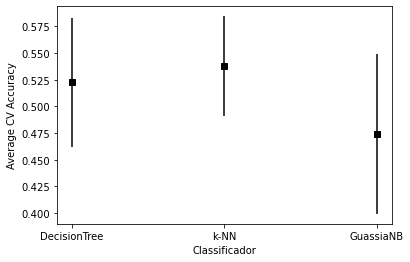

In [59]:
y = list(map(lambda x: x[1], accuracies_cv_finais))
yerr = list(map(lambda x: x[2], accuracies_cv_finais))

plt.errorbar(scores_finais.keys(), y, yerr=yerr,  fmt='s', color="black")
plt.xlabel("Classificador")
plt.ylabel("Average CV Accuracy")
plt.show()

Após analisar os dados pudemos concluir que o classificador DecisionTree obtém a melhor accuracy (por uma grande margem! 8%) quando treinado com todos os dados de treino disponíveis. O classificador k-NN apresenta a segunda melhor e o GuassianNB a pior. De acordo com as scores CV era de esperar que o k-NN estivesse mais perto (quase idênticos) do DecisionTree e se fosse-mos escolher apenas pela score CV seria díficil escolher o melhor, mas dado a diferença nas accuracies da classificação total teremos de considerar o classificador DecisionTree como o melhor dos três.  

Esta diferença entre as scores totais e scores CV pode ser explicada simplesmente pela aleatoridade da CV, que apesar de repartir os dados em 10 segmentos no nosso caso, pode ainda apresentar resultados inconsistentes. Pois quando corrido várias vezes seguidas apresenta diferentes resultados (não muito diferentes entre si, mas diferentes na mesma).  

Também temos de considerar que os métodos utilizados para reduzir o número de features nos dois casos foram diferentes, tendo sido utilizado o RecursiveFeatureElimination na DecisionTree e o SequencialFeatureSelector no k-NN. Apesar de ambos terem o mesmo objectivo o método como o alcançam é diferente e pode ultimamente influenciar os resultados quando comparados diretamente.  

Ainda pelos resultados obtidos podemos também concluir que o classificador Naive Bayes não parece ser o mais indicado para este tipo de conjunto de dados.

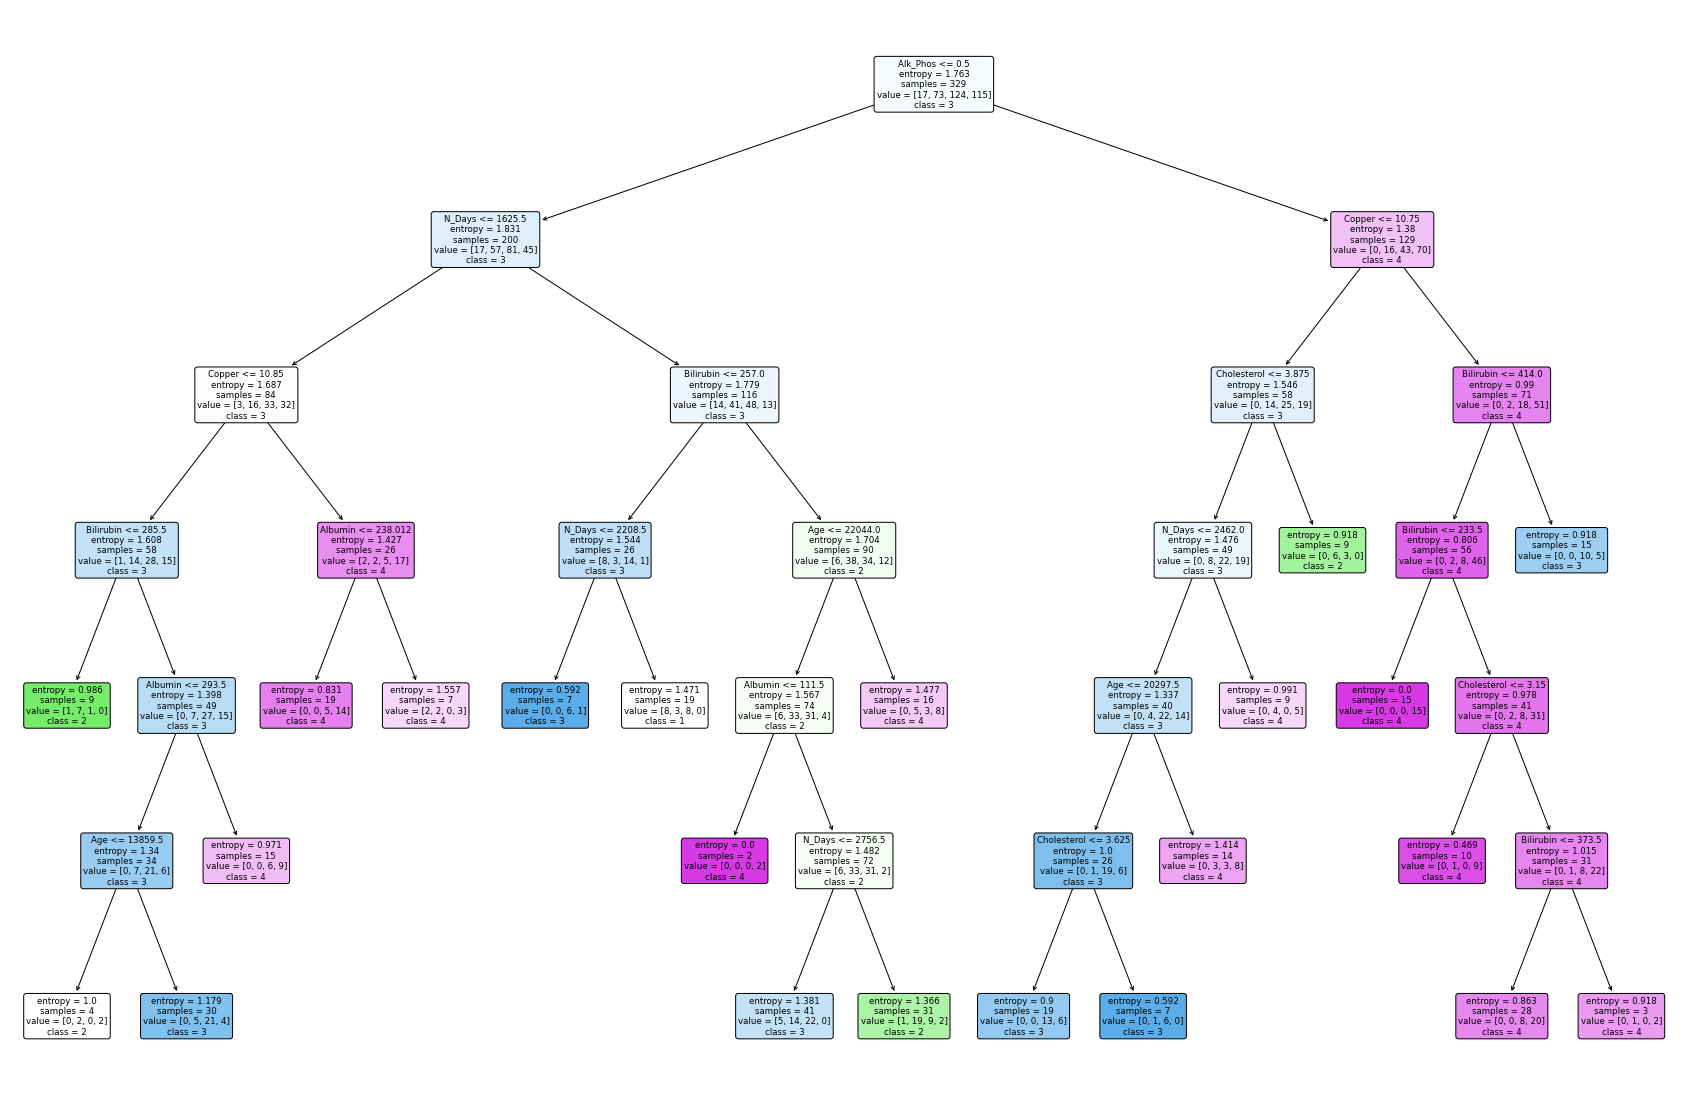

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=[30,20]) # width, height in inches
plot_tree(dtc_best,
         feature_names=df_train_processado.columns,
         class_names=["1","2","3","4"],
        filled=True, rounded=True)
plt.show()

Analisando o plot da árvore de decisão podemos observar que apenas duas folhas terminam com entropia zero, isto indica que o classificador não está overfitted aos dados de treino e que tem o potencial de generalizar melhor. O que confirma o que observamos com as scores de accuracy.  

Claro que também observamos folhas com muito poucas samples o que não é muito desejado quando se pretende que o classificador generalize bem, mas isto também é um indicador de que o classificar poderia ainda ser melhorado se fossem ajustados outros parâmetros ou se fosse realizado um pré-processamento dos dados mais efetivo.

## 3. Validação do modelo final ajustado com um conjunto de validação independente

(remover) O ficheiro `test.csv` contém um conjunto de dados não usado para treinar o modelo definido no ponto #2. 
* Preparar o data set
* Correr o modelo selecionado como sendo o melhor nestes dados
* Apresentar os resultados para as métricas de validação
* Discutir os resultados alcançados confrontando os resultados com os obtidos anteriormente

Para preparar o data set vamos seguir os mesmos passos utilizados para os dados de treino

In [17]:
df_test = pd.read_csv("test.csv")
df_test_categorical = df_test.select_dtypes([object])
df_test_numerical = df_test.select_dtypes([np.number]).drop(columns=["ID"])
df_test_categorical_dummies = pd.get_dummies(df_test_categorical)
df_test_processado = pd.concat([df_test_numerical, df_test_categorical_dummies], axis=1, join='inner')
X_test = df_test_processado.values
X_test

array([[9.3900e+02, 2.2767e+04, 1.7000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.3020e+03, 2.2111e+04, 6.6000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.4430e+03, 1.4975e+04, 1.2000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.1110e+03, 1.9724e+04, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.8120e+03, 1.8628e+04, 3.4000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.7800e+02, 2.3376e+04, 1.8000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [18]:
predictions = list(dtc_best.predict(rfe_dtc_best.transform(X_test)))

In [29]:
s_test = StandardScaler()
s_test.fit(X_test)
X_test_normalizado = s_test.transform(X_test)
predictions = list(knn_best.predict(sfs_knn_best.transform(X_test_normalizado)))

## 4. Competição

(remover) Explicar os passos feitos para chegar à solução submetida na competição, tendo em conta:

* A escolha dos parâmetros usados pelos classificadores
* A escolha de atributos mais relevantes para a aprendizagem dos modelos
    

In [118]:
with open("submission.csv","w") as output:
    output.write("ID,Stage\n")
    for id, stage in enumerate(predictions):
        output.write(f"{id+329},{int(stage)}\n")